# Tutorial 3 - Python For Data Analysis 🐍
---
## 📈 Matplotlib & Seaborn 📉

### *Table of Contents*


  - [Exercise 4](#exercise-4) : Traffic accidents - Seaborn


<a name="exercise-4">

### Exercise 4 : Traffic Accidents - Seaborn
---

In EDA (Exploratory Data Analysis), we rarely use matplotlib directly. We use it for highly customized visualizations. For quick plots, we can use pandas built-in plots or use external libraries, like Seaborn.

We can also use more developed libraries like plotly or bokeh, allowing to create interactive visualizations and entire dashboards.

Get the dataframe we used in the previous TP. Don’t forget to add a title, x labels, y labels to every plot you make! Visualizations are used to communicate with people who are nontech- nical and/or who have never seen your data.


https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### 1) Use the dataframe you created on 2.25, representing the relationship between ‘moving obstacles’ and ‘transport vehicles’. Create a dataframe using this data, marking the correlation between each variable in the heatmap. Add a title and change the style of this plot. Here’s an example of the expected output:

In [8]:
df = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/be2191a6-a7cd-446f-a9fc-8d698688eb9e")
df.columns = ["Num_Acc", "sens_de_Circulation", "catV","nb_occupants", "obstacle_fixe", "obstacle_mobile", "choc", "manoeuvre" , "num_vehicule" ]
df_heatmap = df.groupby(["catV","obstacle_mobile"])["nb_occupants"].sum().reset_index()
df_heatmap = df_heatmap[df_heatmap["catV"].isin([37, 38 ,39 ,40])]
df_heatmap["catV"] = df_heatmap["catV"].replace([37, 38 ,39 ,40], ["Autobus", "Autocar", "Train", "Tramway"])
df_heatmap["obstacle_mobile"] = df_heatmap["obstacle_mobile"].replace([0, 1 ,2, 4, 9], ["Aucun", "Piéton", "Vehicule", "Véhicule sur rail", "Autre"])

In [9]:
df_heatmap = df_heatmap.pivot(index="catV", columns="obstacle_mobile", values="nb_occupants")

<Axes: xlabel='obstacle_mobile', ylabel='catV'>

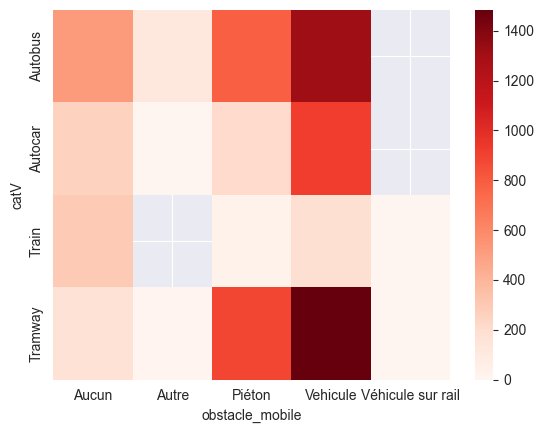

In [13]:
sns.heatmap(df_heatmap, cmap='Reds')

#### 2) Create a pie chart representing the frequency of ‘accident numbers’ by ‘type of mov- ing obstacle’

In [15]:
df_pie = df.groupby(["obstacle_mobile"])["Num_Acc"].count().reset_index()
df_pie = df_pie[df_pie["obstacle_mobile"].isin([0, 1 ,2, 4, 9])]
df_pie["obstacle_mobile"] = df_pie["obstacle_mobile"].replace([0, 1 ,2, 4, 9], ["Aucun", "Piéton", "Vehicule", "Véhicule sur rail", "Autre"])

([<matplotlib.patches.Wedge at 0x171a32686d0>,
 [Text(0.9017854196681706, 0.6299071811575906, 'Aucun'),
  Text(0.012969004309430168, 1.0999235450372096, 'Piéton'),
  Text(-0.6750132952941879, -0.8685373055753459, 'Vehicule'),
  Text(1.096894397280011, -0.08259952309621191, 'Véhicule sur rail'),
  Text(1.099287098601634, -0.039596399432290035, 'Autre')],
 [Text(0.49188295618263844, 0.3435857351768675, '19.4%'),
  Text(0.007074002350598273, 0.5999582972930233, '10.8%'),
  Text(-0.36818907016046604, -0.4737476212229159, '68.5%'),
  Text(0.5983060348800059, -0.045054285325206486, '0.1%'),
  Text(0.5996111446918003, -0.02159803605397638, '1.1%')])

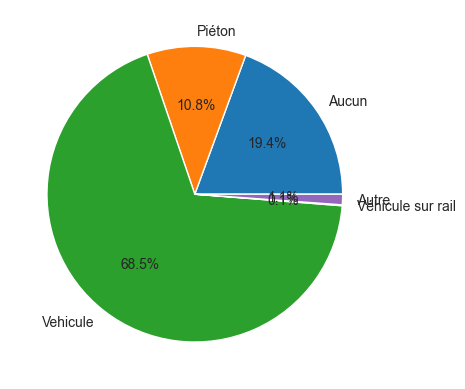

In [16]:
plt.pie(df_pie["Num_Acc"], labels=df_pie["obstacle_mobile"], autopct='%1.1f%%')

#### 3) Modify the previous plot to have the frequency of the single accident numbers

In [31]:
df_pie_second = df.groupby(["obstacle_mobile"])["Num_Acc"].unique().apply(lambda x: len(x)).reset_index()
df_pie_second = df_pie_second[df_pie_second["obstacle_mobile"].isin([0, 1 ,2, 4, 9])]
df_pie_second["obstacle_mobile"] = df_pie_second["obstacle_mobile"].replace([0, 1 ,2, 4, 9], ["Aucun", "Piéton", "Vehicule", "Véhicule sur rail", "Autre"])

([<matplotlib.patches.Wedge at 0x171a4c9f9d0>,
 [Text(0.7261379994019076, 0.8262709034115842, 'Aucun'),
  Text(-0.6761975968018021, 0.8676155888868454, 'Piéton'),
  Text(-0.2681813247682569, -1.0668077507430958, 'Vehicule'),
  Text(1.0930892241825667, -0.12310949588051598, 'Véhicule sur rail'),
  Text(1.0984177493597604, -0.058978367995722716, 'Autre')],
 [Text(0.3960752724010405, 0.4506932200426822, '27.1%'),
  Text(-0.36883505280098294, 0.473244866665552, '17.0%'),
  Text(-0.14628072260086739, -0.5818951367689612, '54.1%'),
  Text(0.5962304859177635, -0.06715063411664507, '0.2%'),
  Text(0.5991369541962329, -0.032170018906757844, '1.7%')])

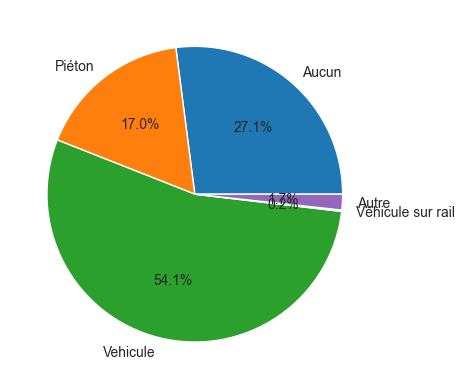

In [32]:
plt.pie(df_pie_second["Num_Acc"], labels=df_pie_second["obstacle_mobile"], autopct='%1.1f%%')

#### 4) Calculate the ‘'number of accidents’ per ‘fixed obstacle’. Visualize the result in a hori- zontal bar chart.

<Axes: xlabel='Num_Acc', ylabel='obstacle_fixe'>

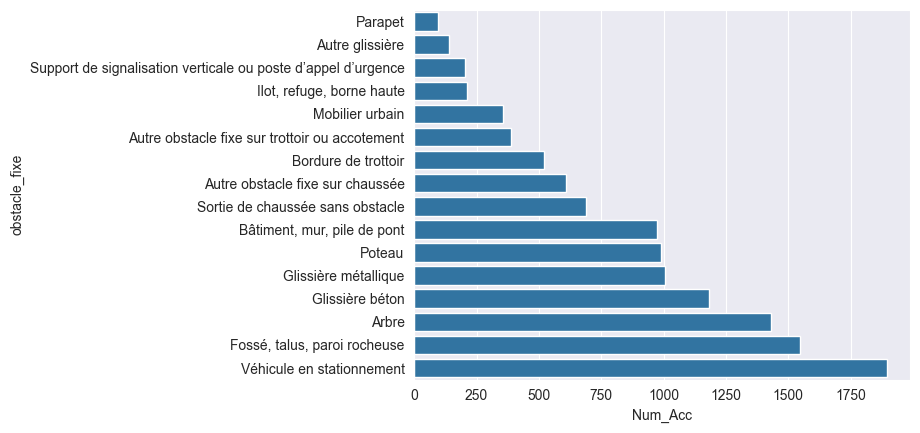

In [41]:
df_horizontal = df.groupby(["obstacle_fixe"])["Num_Acc"].nunique().reset_index().sort_values(by="Num_Acc")
df_horizontal = df_horizontal[df_horizontal["obstacle_fixe"].isin([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])]
df_horizontal["obstacle_fixe"] = df_horizontal["obstacle_fixe"].replace([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17], ["Véhicule en stationnement","Arbre","Glissière métallique","Glissière béton","Autre glissière","Bâtiment, mur, pile de pont","Support de signalisation verticale ou poste d’appel d’urgence","Poteau","Mobilier urbain","Parapet","Ilot, refuge, borne haute","Bordure de trottoir","Fossé, talus, paroi rocheuse","Autre obstacle fixe sur chaussée","Autre obstacle fixe sur trottoir ou accotement","Sortie de chaussée sans obstacle","Buse – tête d’aqueduc" ])
sns.barplot(data=df_horizontal, x="Num_Acc", y="obstacle_fixe")

#### 5) Zoom in on the lower part of this graph, keep values less than 1500 only (and if their- values are higher, place it at the maximum of the plot)

[(0.0, 1500.0)]

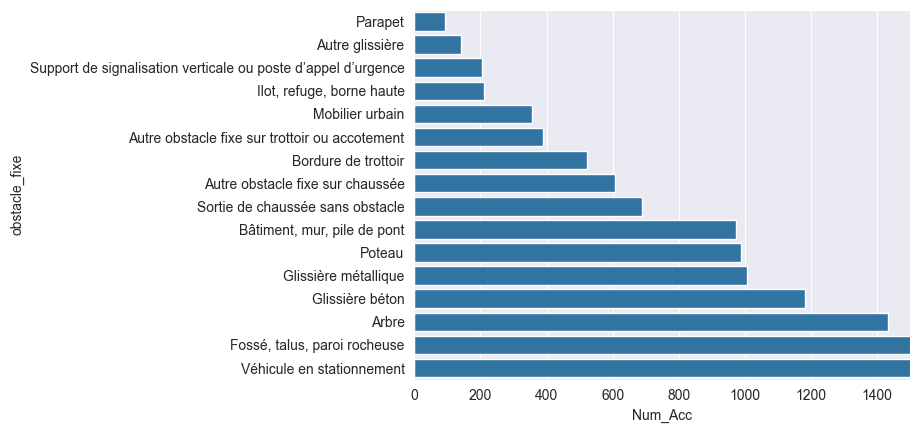

In [46]:
ax = sns.barplot(data=df_horizontal, x="Num_Acc", y="obstacle_fixe")
ax.set(xlim=(0, 1500))

6) Zoom in to the upper part of this graph, keep values greater than 1500 only (and if their values are lower, remove them from the graph)

[(1500.0, 2000.0)]

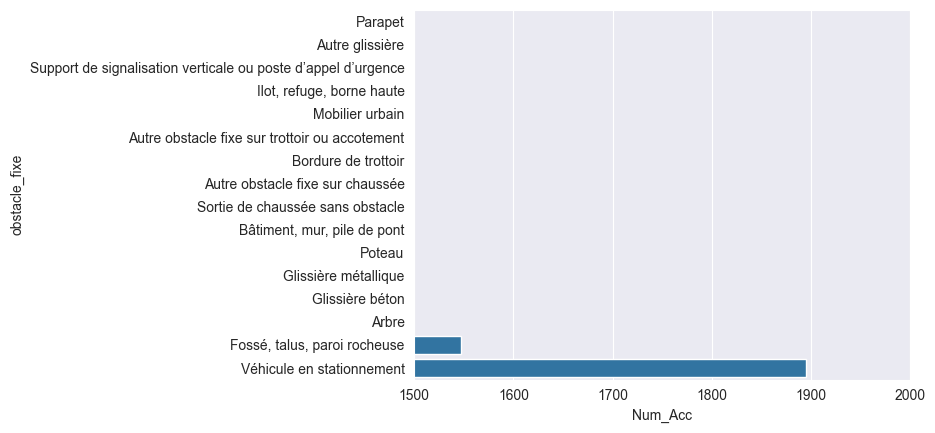

In [51]:
ax = sns.barplot(data=df_horizontal, x="Num_Acc", y="obstacle_fixe")
ax.set(xlim=(1500, 2000))

### Exercise 5 : (TODO)
---

Read the file named characteristics_2016.csv containing the characteristics of each accident. Do not hesitate to go back to the documentation if necessary to better understand the columns

Documentation : https://www.data.gouv.fr/fr/datasets/r/6cade01c-f69d-4779-b0a4- 20606069888f

File path: https://www.data.gouv.fr/fr/datasets/r/96aadc9f-0b55-4e9a-a70e-c627ed97e6f7

#### 1) Create a scatter plot using long and lat columns. Can you recognize the map of France? Maybe by zooming in a bit?

#### 2) Create a time series graph, representing the evolution of traffic accidents over time. Be specific in your graph (the more details you can provide, the better it will be), while being clear to someone who is seeing it for the first time

#### 3) Count and visualize the number of accidents by department. Show the 10 most dan- gerous departments.

#### 4) Create a new column having an explicit weather label. Analyze this new column for more information on accidents. When do they occur?


#### 5) Create two new columns, the first will contain the hour of the accident, the second will contain the minute. Which hour is the most dangerous for drivers?

#### 6) Analyze the most dangerous moment for each department. Does a specific moment stand out?

#### 7) Does Ile-de-France have more accidents than in the provinces? Create a new column and analyze the behavior in each of these two groups (Ile-de-France vs provinces). Remember to also analyze the time of day, the weather, etc.

#### 8) Create a new column representing 4 period of the day. Morning, afternoon, evening, night. Use this new column to analyze any correlations with other columns. Present your results in one or more graphs.